<a href="https://colab.research.google.com/github/hassanalla12/SOM/blob/main/Som.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install MiniSom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for MiniSom: filename=MiniSom-2.3.1-py3-none-any.whl size=10589 sha256=6e30d158b3549fea0248acaaea4127b39ea74daf2644b55b59de21fadcbde3b6
  Stored in directory: /root/.cache/pip/wheels/c7/92/d2/33bbda5f86fd8830510b16aa98c8dd420129b5cb24248fd6db
Successfully built MiniSom


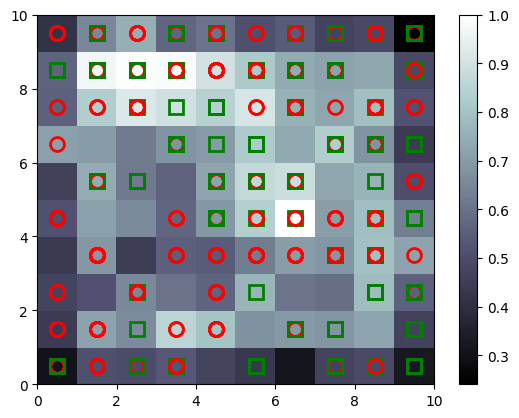

In [ ]:
# Self Organizing Map

# Importing the libraries
import numpy as np
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)

# Training the SOM
from minisom import MiniSom
som = MiniSom(x = 10, y = 10, input_len = 15, sigma = 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

# Visualizing the results
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()




In [ ]:
# Obtaining the IDs of clients
client_ids = dataset.iloc[:, 0].values

# Calculating the distances between SOM units and input data
distances = som.distance_map().reshape(-1)

# Setting a threshold to determine potential frauds
threshold = np.percentile(distances, 90)  # Choose the appropriate threshold based on your dataset

# Finding the indices of fraudulent clients
fraud_indices = np.where(distances > threshold)[0]

# Obtaining the IDs of fraudulent clients
fraudulent_client_ids = client_ids[fraud_indices]

# Displaying the IDs of fraudulent clients
print("IDs des clients frauduleux détectés :")
for client_id in fraudulent_client_ids:
    print(client_id)



IDs des clients frauduleux détectés :
15767729
15588123
15748552
15678882
15789611
15731586
15682860
15705918
15766183
15777994


In [ ]:
# Finding the frauds
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(8,1)], axis = 0)
frauds = sc.inverse_transform(frauds)
LstID=frauds[:,0]
print("les IDs des clients qui sont susceptible d’être frauduleux :")
for idl in LstID:
    print( f' Id :{int(idl)}' )

SyntaxError: ignored